# A mesterséges intelligencia matematikai alapjai gyakorlat
# PTE Gépi tanulás

## 12. Gyakorlat: A beadandó feladat áttekintése
### 2024. május 7.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/train.csv") # adatok betöltése

y = df['target_reg']
X = df.drop(['target_reg'], axis = 1) # X,y beállítása

#Van-e nan érték az y-ban?

In [ ]:
y.isna().sum()

0

#Milyen az y eloszlása

In [ ]:
df['target_reg'].describe()

count    3.318000e+04
mean     2.384319e+05
std      2.413623e+06
min     -1.650300e+04
25%      0.000000e+00
50%      0.000000e+00
75%      3.125000e+01
max      1.047418e+08
Name: target_reg, dtype: float64

<Axes: >

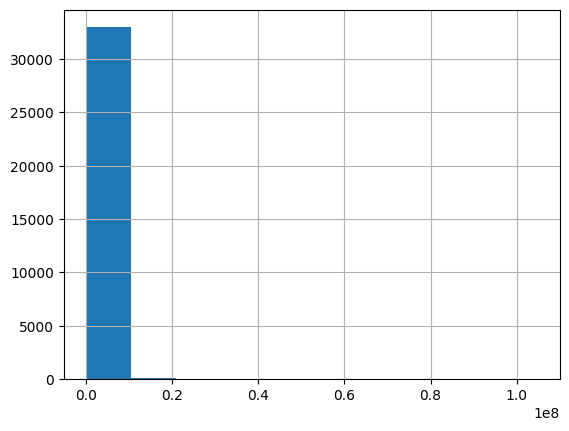

In [ ]:
y.hist()

#Y eloszlása ha kivesszük a 0 elemeket

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<Axes: title={'center': 'target_reg'}>]], dtype=object)

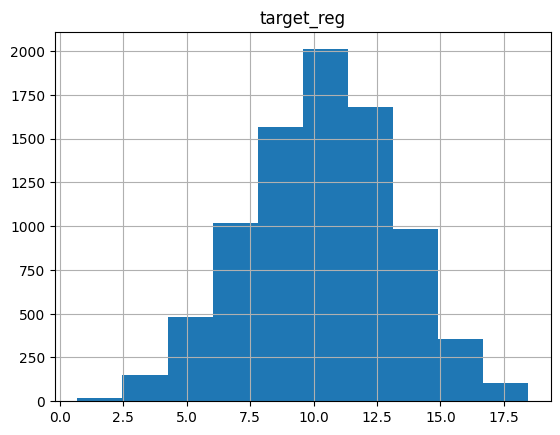

In [ ]:
df_notnull = df[df['target_reg'] !=0]
Y_log = pd.DataFrame(np.log1p(df_notnull['target_reg']))
Y_log.hist()


#Milyen nan elemek vannak az X-ben

In [ ]:
total = X.isna().sum().sort_values(ascending=False)
missing=pd.DataFrame(total).head(20)
print (missing.head(20))

                                     0
agazat_2015_3_alkategoria         1383
agazat_2016_3_alkategoria         1382
agazat_2014_3_alkategoria         1382
KKV_BESOROLAS_2016_2_alkategoria    24
KKV_BESOROLAS_2014_fo_kategoria     24
KKV_BESOROLAS_2014_2_alkategoria    24
KKV_BESOROLAS_2015_fo_kategoria     24
KKV_BESOROLAS_2015_1_alkategoria    24
KKV_BESOROLAS_2015_2_alkategoria    24
KKV_BESOROLAS_2016_fo_kategoria     24
KKV_BESOROLAS_2016_1_alkategoria    24
KKV_BESOROLAS_2014_1_alkategoria    24
agazat_2014_fo_kategoria             4
agazat_2014_2_alkategoria            4
agazat_2014_1_alkategoria            4
agazat_2015_fo_kategoria             3
agazat_2015_1_alkategoria            3
agazat_2015_2_alkategoria            3
alakul_ev                            2
regyeb_2014                          0


#Korrelációs mátrix készítése a telejs adatszettre

In [ ]:
corrmat = df.select_dtypes(include=np.number).corr()
f, ax = plt.subplots(figsize=(200, 90))
sns.heatmap(corrmat, vmax=.8, annot=True);

In [ ]:
corrmat.style.background_gradient(cmap='coolwarm')

#A 0.5 nél nagyobb korrelációjú oszlopok

In [ ]:
corrmat[corrmat['target_reg']>0.5]


id  target_reg  KATEGORIKUS_VALTOZO_2014  \
target_reg     0.017135    1.000000                  0.234078   
arbevert_2014  0.053929    0.662148                  0.269146   
arbevert_2015  0.050794    0.674769                  0.270815   
arbevert_2016  0.047639    0.705455                  0.278622   
arbevexp_2014  0.019556    0.922805                  0.232872   
arbevexp_2015  0.019532    0.967795                  0.234523   
arbevexp_2016  0.017247    0.978296                  0.231851   
ranyag_2014    0.051394    0.623873                  0.251027   
ranyag_2015    0.047590    0.650217                  0.252533   
ranyag_2016    0.042845    0.673150                  0.255711   
rszem_2016     0.044807    0.510627                  0.221443   

               KATEGORIKUS_VALTOZO_2015  KATEGORIKUS_VALTOZO_2016  \
target_reg                     0.239411                  0.238652   
arbevert_2014                  0.271996                  0.268691   
arbevert_2015                  0.274047                  0.271344   
arbevert_2016                  0.280539                  0.278185   
arbevexp_2014                  0.237919                  0.237023   
arbevexp_2015                  0.239742                  0.239040   
arbevexp_2016                  0.237123                  0.236324   
ranyag_2014                    0.254504                  0.250196   
ranyag_2015                    0.256480                  0.252855   
ranyag_2016                    0.259262                  0.255834   
rszem_2016                     0.219215                  0.220739   

               aktelh_2014  aktelh_2015  aktelh_2016  aktsajt_2014  \
target_reg        0.081456     0.061143     0.059887      0.028285   
arbevert_2014     0.299855     0.200419     0.199558      0.153426   
arbevert_2015     0.295275     0.196347     0.197372      0.083465   
arbevert_2016     0.280590     0.190987     0.192251      0.081409   
arbevexp_2014     0.085606     0.059368     0.058406      0.026615   
arbevexp_2015     0.082449     0.057890     0.056385      0.030657   
arbevexp_2016     0.085674     0.060416     0.058832      0.028208   
ranyag_2014       0.230682     0.158475     0.162284      0.218617   
ranyag_2015       0.226802     0.159767     0.162172      0.161026   
ranyag_2016       0.207073     0.150688     0.145110      0.245106   
rszem_2016        0.315120     0.243864     0.245086      0.345997   

               aktsajt_2015  ...  rovkot_2016  rszem_2014  rszem_2015  \
target_reg         0.043007  ...     0.105520    0.480854    0.490843   
arbevert_2014      0.172489  ...     0.167189    0.665689    0.657229   
arbevert_2015      0.121403  ...     0.159685    0.646469    0.645147   
arbevert_2016      0.131533  ...     0.182678    0.657270    0.658780   
arbevexp_2014      0.027509  ...     0.099497    0.478845    0.477527   
arbevexp_2015      0.038337  ...     0.100385    0.486820    0.493578   
arbevexp_2016      0.038380  ...     0.107477    0.470799    0.477975   
ranyag_2014        0.199907  ...     0.130113    0.565997    0.557178   
ranyag_2015        0.180296  ...     0.124257    0.559444    0.556053   
ranyag_2016        0.234958  ...     0.130464    0.573402    0.571944   
rszem_2016         0.343689  ...     0.330033    0.978668    0.991726   

               rszem_2016  sajattok_2014  sajattok_2015  sajattok_2016  \
target_reg       0.510627       0.201046       0.200086       0.226309   
arbevert_2014    0.654606       0.317306       0.298148       0.329818   
arbevert_2015    0.644389       0.307165       0.292379       0.323787   
arbevert_2016    0.667183       0.305658       0.293758       0.327890   
arbevexp_2014    0.485244       0.200571       0.190236       0.215753   
arbevexp_2015    0.505216       0.209864       0.202119       0.226548   
arbevexp_2016    0.494166       0.204962       0.200298       0.226387   
ranyag_2014      0.554520       0.259567       0.242106       0.266326   
ranyag_2015      0.554787  

In [ ]:
corr_col = corrmat[corrmat['target_reg']>0.5].T.columns

In [ ]:
corr_col

Index(['target_reg', 'arbevert_2014', 'arbevert_2015', 'arbevert_2016',
       'arbevexp_2014', 'arbevexp_2015', 'arbevexp_2016', 'ranyag_2014',
       'ranyag_2015', 'ranyag_2016', 'rszem_2016'],
      dtype='object')

#Nagy korrelációs oszlopok felhasználása az X elkészítéséhez

In [ ]:
# X = df[['arbevexp_2014','arbevexp_2015','arbevexp_2016']]

In [ ]:
X= df[corr_col]

In [ ]:
X.isna().sum().sort_values(ascending=False)

target_reg       0
arbevert_2014    0
arbevert_2015    0
arbevert_2016    0
arbevexp_2014    0
arbevexp_2015    0
arbevexp_2016    0
ranyag_2014      0
ranyag_2015      0
ranyag_2016      0
rszem_2016       0
dtype: int64

In [ ]:
X = X.drop(['target_reg'], axis = 1)

#Adatok standardizálása

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # adatok standardizálása 0 átlag 1 szórás
scaler.fit(X)
X_std = pd.DataFrame(scaler.transform(X))


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

In [ ]:
n_samples = 5000
X_train_subset = X_train.sample(n_samples, random_state=42)
y_train_subset = y[X_train_subset.index]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rs_cv = RandomizedSearchCV(
    estimator=rf_reg,
    param_distributions=param_grid,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1,
    )


rs_cv.fit(X_train_subset, y_train_subset)

# Print best hyperparameters and best score
print('Best Hyperparameters:', rs_cv.best_params_)
print('Best Score:', -rs_cv.best_score_)

# Fit the best model to the full training data
best_model = rs_cv.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Print mean squared error and R-squared score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 6, 'bootstrap': False}
Best Score: 602629614423.4257


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mean Squared Error: 238987377806.2378
R-squared Score: 0.9583305109795601
Mean Absolute Error: 59384.63026099362


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear = LinearRegression(fit_intercept=True)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import absolute
from numpy import mean
from numpy import std

cv = KFold(n_splits=10, shuffle=True, random_state=1)

scores = cross_val_score(linear, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = absolute(scores)

print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))


MAE: 55239.249 (6716.996)


In [ ]:
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

model = Ridge()
# define evaluation
cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]

# define search
search = RandomizedSearchCV(model, space, n_iter=10, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X_train_subset, y_train_subset)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -57065.04101029216
Best Hyperparameters: {'alpha': 9.609672126241222e-05, 'fit_intercept': True, 'solver': 'lsqr'}


#Beadandó feladat:

Egy volt adatversenyes feladat:

A Dataracing 2022 versenyén hazai vállalatok adatainak elemzésére nyílik lehetőséged különféle data science eszközökkel. A feladat a hazai vállalatok egy csoportjának exportteljesítményének előrejelzéséről szól, az ehhez az anonimizált adatokat a verseny egyik társszervezője, a Magyar Nemzeti Bank biztosította. Az adatelemzési cél, hogy az egyes cégek múltbeli beszámoló adatai, illetve egyéb statisztikái mérőszámai alapján a versenyzők gépi tanulási eszközökkel előre jelezzék az egyes cégek következő évi exportból származó bevételét.

Mennyire jelezhető előre az egyes cégek üzleti teljesítménye? Milyen szinten lehet becsülni a múltbeli adatok alapján a várható export értékét? Milyen elemzési trükkök vethetők be egy ilyen adathalmaz esetén? Mely algoritmusok a legalkalmasabbak az adott esetben? Ilyen és ehhez hasonló kérdésekre keresi a választ az MNB, mely megválaszolásához a versenyen részvevőként Te is hozzájárulhatsz. A legjobb három megoldás készítő számára magas pénzjutalmak kerülnek kifizetésre.

Az adathalmazról

A verseny során hazai vállalatok adatait elemezzük. Az adathalmazban több mint 30 ezer cég különféle adatait találjuk, a cégek székhelyétől kezdve egészen a létszám és árbevétel információkig.

Az adathalmazban egy-egy sor egy-egy céghez tartozik. A rendelkezésre álló értékek a 2014-2016 időszakban minden évben felvételre kerültek, ezt az időszakot teljes mértékben rendelkezésre bocsájtjuk. Az adathalmazban előfordulhat hiányzó érték, ennek kezelését a versenyzőre bízzuk.

A cél felügyelt gépi tanulási módszerek segítségével előre jelezni az “target_reg” névvel ellátott oszlop (célváltozó) értékét. Ez a változó a 2017-es export értékét reprezentálja ezer Forintban.

A versenyen a célváltozó előre jelzéséhez elsősorban a publikált adathalmaz további oszlopait (bemenő változók) lehet használni.

Minden adat típust használjunk fel!

adatok: ’https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/train.csv’

metrika: Mean Absolute Error MAE

célváltozó: target_reg

Adatok felosztása az alábbiak szerint:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

MAE-t a X_test-en mérjük!


Leadási határidő: 2024. május 22.

Kérdés esetén keressenek!


A beadandó feladatnál a legjobb eredmény + 5%-os tartományon belül az 5-ös, 5-10 % 4, többi 3-as

Pl ha a legjobb eredmény: 52057 (ami 5-ös), akkor a 56343 92%-nak felel meg tehát 4-es.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

import pandas as pd
import numpy as np

# Adatok betöltése
url = 'https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/train.csv'
df = pd.read_csv(url)

# X és y beállítása
y = df['target_reg']
X = df.drop(['target_reg'], axis=1)

# Adatok felosztása tanító és teszt részekre
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Korellációs értékek kiszámítása csak a tanító adatokon
X_train_corr = X_train.copy()
X_train_corr['target_reg'] = y_train  # Célváltozó hozzáadása a korreláció számításhoz
corrmat = X_train_corr.corr()
corr_col = corrmat[corrmat['target_reg'] > 0.5].index  # Az index használata a korreláló változók kiválasztásához

# Változók kiválasztása a korreláló oszlopok alapján
X_train_selected = X_train[corr_col.drop('target_reg')]
X_test_selected = X_test[corr_col.drop('target_reg')]

# Random Forest modell létrehozása és tanítása
rf_model = RandomForestRegressor(n_estimators= 135)
rf_model.fit(X_train_selected, y_train)

# Előrejelzések a teszt adatokon
rf_predictions = rf_model.predict(X_test_selected)

# MAE kiszámítása
rf_mae = mean_absolute_error(y_test, rf_predictions)    
print(f'Random Forest MAE: {rf_mae}')

/tmp/ipykernel_20821/1055523743.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = X_train_corr.corr()


Random Forest MAE: 52083.8838317371


In [3]:
x

/tmp/ipykernel_5777/1793861145.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = X_train_corr.corr()


TypeError: GridSearchCV.__init__() got an unexpected keyword argument 'param_distributions'